In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.datasets import make_blobs

In [14]:
x_data, y_data = make_blobs(n_samples=500, centers = 5, shuffle=True, random_state=10)

print (x_data.shape, y_data.shape)

(500, 2) (500,)


In [15]:
print (x_data [0:10])

print (y_data [0:10])

[[ -7.32786741   4.23641465]
 [  1.12565931   6.32088416]
 [ -0.49239887  -5.28550826]
 [ -7.12432134   6.16236021]
 [  2.38696269   4.11331935]
 [  6.55519802 -10.28277104]
 [ -4.60484127   4.27470475]
 [ -1.27010839  -6.55718306]
 [  5.77989048  -9.7922405 ]
 [ -7.72699176  -9.47166311]]
[3 1 2 3 1 0 3 2 0 4]


In [16]:
df_cluster = np.unique(y_data)

print (df_cluster)

[0 1 2 3 4]


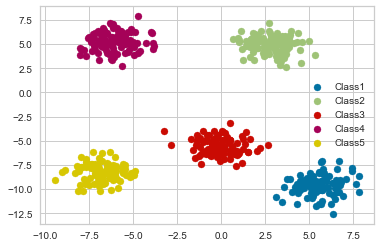

In [17]:
for c in df_cluster: 
    plt.scatter(x_data[y_data == c, 0], x_data[y_data==c, 1], label ='Class{}'.format(c+1))
plt.legend()
plt.show()

# K-means clustering

In [18]:
kmeans = KMeans(
    n_clusters = 5,
    init='k-means++',
    n_init = 10,
    random_state = 0)

kmeans_pred = kmeans.fit_predict(x_data)

In [19]:
print (np.unique(y_data))

print (np.unique(kmeans_pred))

[0 1 2 3 4]
[0 1 2 3 4]


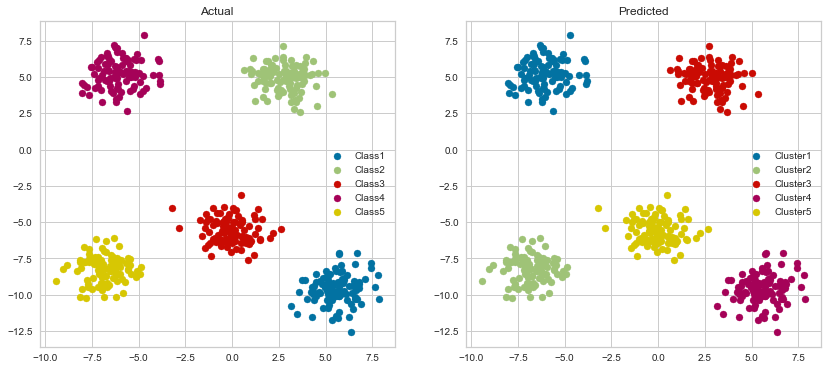

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Actual')
for c in np.unique(y_data): 
    plt.scatter(x_data[y_data == c, 0], x_data[y_data==c, 1], label ='Class{}'.format(c+1))
plt.legend()

plt.subplot(1,2,2)
plt.title('Predicted')
for c in np.unique(kmeans_pred): 
    plt.scatter(x_data[kmeans_pred == c, 0], x_data[kmeans_pred==c, 1], label ='Cluster{}'.format(c+1))
plt.legend()
plt.show()

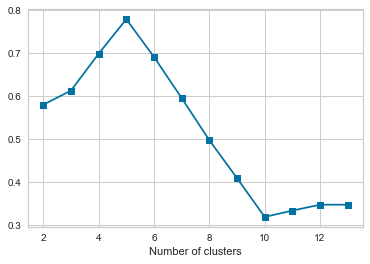

In [21]:
scores = []
cluster_results = {}
for n in np.arange(2,14):
    kmeans.n_clusters = n
    cluster_results[n]=kmeans.fit_predict(x_data)
    scores.append(silhouette_score(x_data, kmeans.labels_)) 
    
plt.figure
plt.plot(np.arange(2,14), scores, marker='s')
plt.xlabel('Number of clusters')
plt.show()

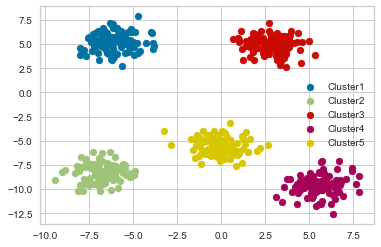

In [22]:
# use of n=5 from silhouette_score

plt.figure
_results = cluster_results[5]
for c in np.unique(_results): 
    plt.scatter(x_data[_results == c, 0], x_data[_results==c, 1], label ='Cluster{}'.format(c+1))
plt.legend()
plt.show()    

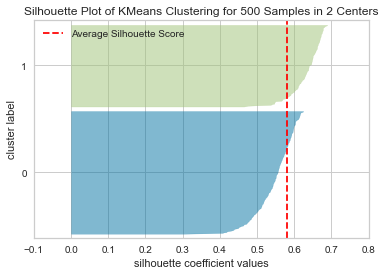

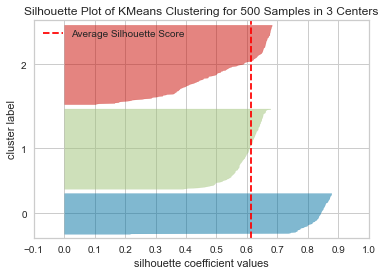

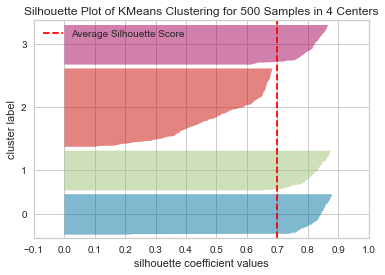

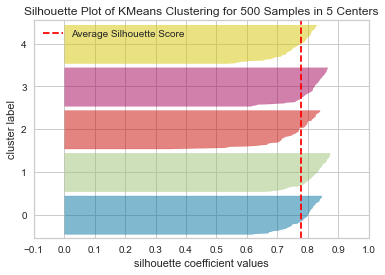

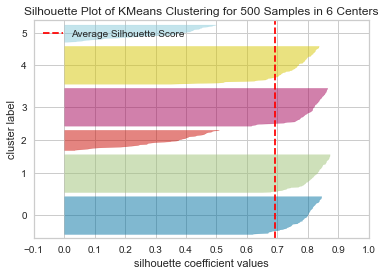

In [23]:

for i in [2, 3, 4, 5, 6]: 

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(x_data)
    visualizer.show()